In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mtf_file = "mtf/K2.csv"

array([[0.        , 0.99999989],
       [0.01587302, 0.99612194],
       [0.03174603, 0.99104406],
       [0.04761905, 0.98482507],
       [0.06349206, 0.97752275],
       [0.07936508, 0.96919388],
       [0.09523809, 0.95989416],
       [0.11111111, 0.94967832],
       [0.12698413, 0.9386    ],
       [0.14285714, 0.92671185],
       [0.15873016, 0.91406546],
       [0.17460317, 0.90071142],
       [0.19047619, 0.88669926],
       [0.20634921, 0.8720775 ],
       [0.22222222, 0.85689361],
       [0.23809524, 0.84119404],
       [0.25396825, 0.8250242 ],
       [0.26984127, 0.80842848],
       [0.28571429, 0.79145024],
       [0.3015873 , 0.77413179],
       [0.31746032, 0.75651444],
       [0.33333333, 0.73863843],
       [0.34920635, 0.720543  ],
       [0.36507936, 0.70226635],
       [0.38095238, 0.68384563],
       [0.3968254 , 0.665317  ],
       [0.41269841, 0.64671554],
       [0.42857143, 0.62807533],
       [0.44444445, 0.60942942],
       [0.46031746, 0.59080981],
       [0.

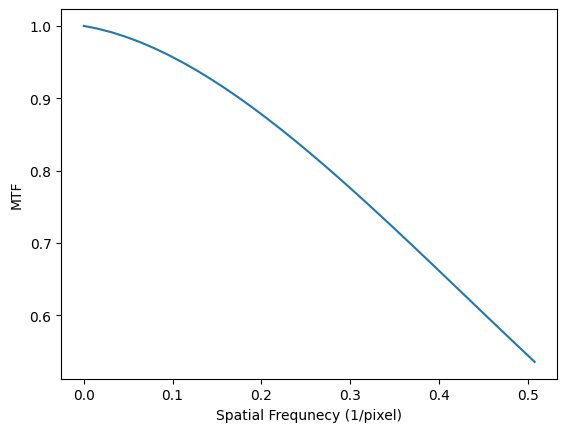

In [4]:
# Load the mtf
mtf = np.genfromtxt(mtf_file, delimiter=",")

plt.plot(mtf[:, 0], mtf[:, 1])
plt.xlabel("Spatial Frequnecy (1/pixel)")
plt.ylabel("MTF")

mtf

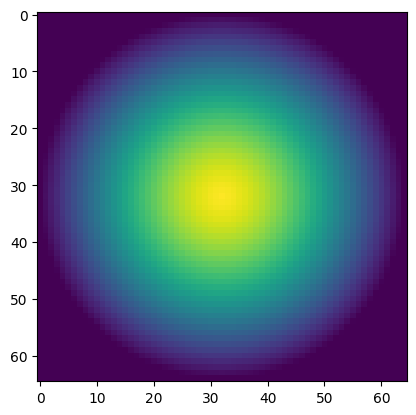

In [5]:
# Generate the image vectors
max_freq = np.max(mtf[:, 0])
N = 2 * len(mtf[:, 0]) - 1
xs = np.linspace(-max_freq, max_freq, N)
ys = np.linspace(-max_freq, max_freq, N)

xs, ys = np.meshgrid(xs, ys)

# Compute the radii
rs = np.sqrt(xs**2 + ys**2)

# Interpolate the mtf
measured_mtfs = np.interp(rs, mtf[:, 0], mtf[:, 1])

# Plot the output
plt.imshow(measured_mtfs)


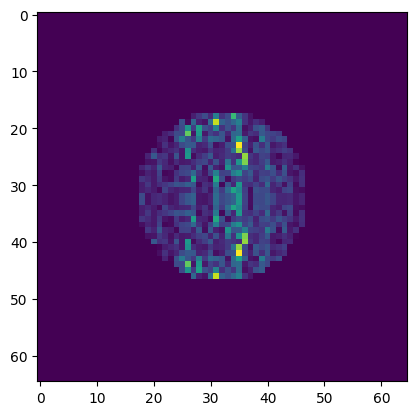

In [ ]:
# Recover phase data with GS phase retrival
initial_phase = np.random.uniform(0, 2 * np.pi, (N, N))
otf_i = measured_mtfs * np.exp(1j * initial_phase)

# Limited support constaint mask
xs_i = np.arange(0, otf_i.shape[0])
ys_i = np.arange(0, otf_i.shape[1])

xs_i, ys_i = np.meshgrid(xs_i, ys_i)

rs_i = np.sqrt((xs_i - otf_i.shape[0] // 2)**2 + (ys_i - otf_i.shape[1] // 2)**2)
mask = rs_i < 15

for i in range(10000):
    # Compute the psf
    psf_i = np.fft.ifft(np.fft.ifftshift(otf_i))
    
    # Apply a real valued constraint to the psf
    psf_i = np.abs(psf_i)
    
    # Set the center value to 1
    psf_i[psf_i.shape[0] // 2, psf_i.shape[0] // 2] = 1
    
    # Apply a limited support constraint to the psf
    psf_i[~mask] = 0
    
    # Compute the otf
    otf_i = np.fft.fftshift(np.fft.fft2(psf_i))
    
    # Compute the mtf and adjust the amplitude to match the measured mtf
    mtf_i = np.abs(otf_i)
    
    # Adjust the otf amplitude
    otf_i = otf_i * (measured_mtfs / mtf_i)

plt.imshow(psf_i)

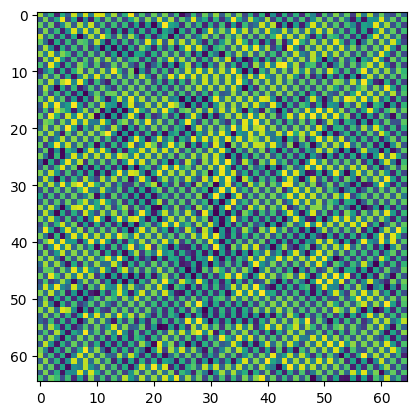

In [52]:
plt.imshow(np.angle(otf_i))